<a href="https://colab.research.google.com/github/anand-bidwalkar/SIT796-Reinforcement-Learning/blob/master/Task-3.2D/SIT_796_Task_3_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
from contextlib import closing
import numpy as np
from io import StringIO
from gym import utils
from gym.envs.toy_text import discrete
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [3]:
def play_episodes(enviorment, n_episodes, policy, random = False):
    
    total_reward = 0
    episode_rewards = []
    
    for episode in range(n_episodes):
        
        terminated = False        
        state = enviorment.reset()
        
        while not terminated:
            
            # check if the random flag is not true then follow the given policy other wise take random action
            if random:
                action = enviorment.action_space.sample()
            else:
                action = policy[state]

            # take the next step
            next_state, reward,  terminated, info = enviorment.step(action)
            
            # accumalate total reward
            total_reward += reward
            
            # change the state
            state = next_state

            episode_rewards.append((episode, total_reward))
                
    average_reward = total_reward / n_episodes
    
    return total_reward, average_reward, episode_rewards


In [62]:
class CustomEnv(Env):
    def __init__(self):
        self.action_space = Discrete(3)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60

        self.P = {s: {a: [] for a in range(3)} for s in range(101)}
        self.I = np.matrix([[0.3333, 0.333, 0.3333]])
        self.T = np.matrix([[0.6, 0.2, 0.2],
                      [0.5, 0.3, 0.2],
                      [0.4, 0.3, 0.4]])
        self.T1 = self.I * self.T
        
    def step(self, action):
 
        self.state += action -1 
        self.shower_length -= 1 
        
        if self.state >=37 and self.state <=39: 
            reward =1 
            T1 = self.I * self.T
        else: 
            reward = -1 
            T1 = self.T1 * self.T
        
        if self.shower_length <= 0: 
            done = True
        else:
            done = False          
        
        self.T1 = T1        
        self.P[self.state][action].append((self.T1.item(0) , reward, self.state))

        info = {}
        
        return self.state, reward, done, info

    def render(self):
        pass
    
    def reset(self):
        self.state = 38 + random.randint(-3,3)        
        self.shower_length = 60 
        return self.state

In [63]:
import numpy as np
#env = ShowerEnv()
env = gym.make('FrozenLake-v0')
n_episode = 1000
total_reward, avg_reward, episode_rewards = play_episodes(env, n_episode, [], random = True)

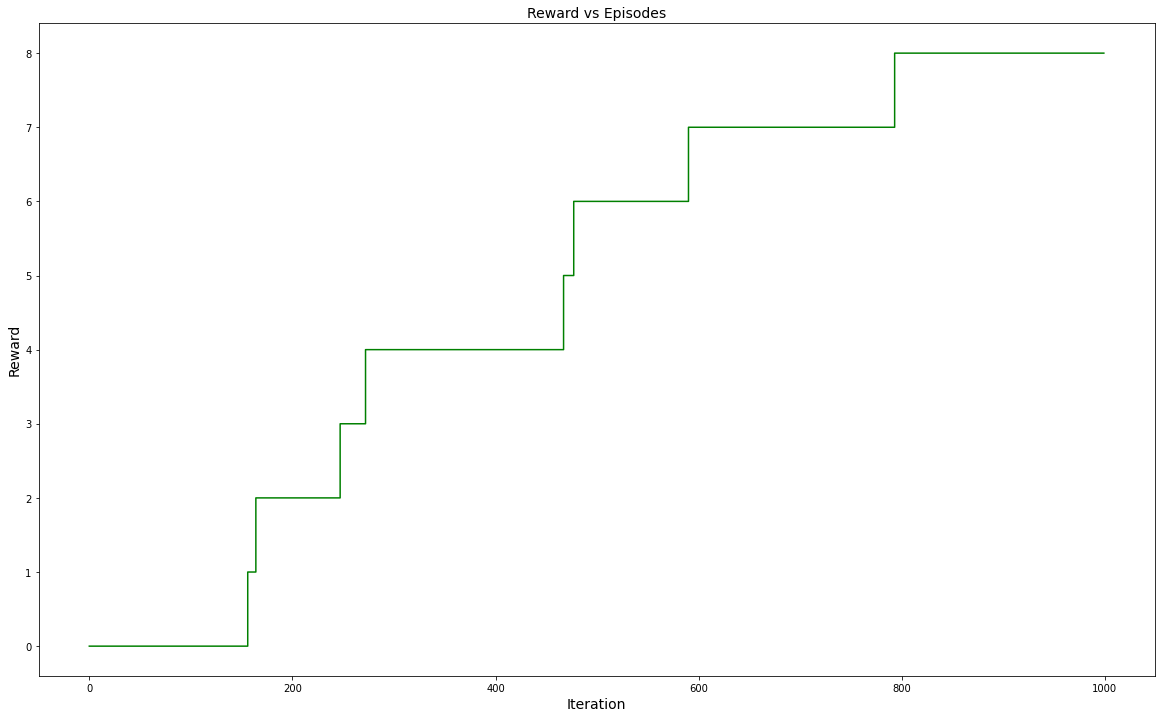

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.plot([x for x, y in episode_rewards], [y for x, y in episode_rewards],color='green')
plt.title('Reward vs Episodes', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Reward', fontsize=14)
plt.grid(False)
plt.show()

In [65]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')
import mdp

Mounted at /content/drive


In [66]:
from mdp import MDP
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


In [90]:
transition_probs = {
    'state0': {
        'action0':{'state0':0.5, 'state1':0.5},
        'action1':{'state0':0.5, 'state1':0.5},
        'action2':{'state0':0.5, 'state1':0.5},
    },
    'state1': {
        'action0':{'state0':0.6665, 'state1':0.3335},
        'action1':{'state0':0.6665, 'state1': 0.3335},
        'action2':{'state0':0.6665, 'state1': 0.3335}
    },
    'state2': {
        'action0':{'state0':0.66665, 'state1':0.33335},
        'action1':{'state0':0.66665, 'state1': 0.33335},
        'action2':{'state0':0.66665, 'state1': 0.33335},
    },
    'state3': {
        'action0':{'state0':0.666665, 'state1':0.333335},
        'action1':{'state0':0.666665, 'state1':0.333335},
        'action2':{'state0':0.66665, 'state1': 0.33335},
    },
    'state4': {
        'action0':{'state0':0.6666665, 'state1':0.3333335},
        'action1':{'state0':0.6666665, 'state1':0.3333335},
        'action2':{'state0':0.66665, 'state1': 0.33335},
    },
    'state5': {
        'action0':{'state0':0.66666665, 'state1':0.33333335},
        'action1':{'state0':0.66666665, 'state1':0.33333335},
        'action2':{'state0':0.66665, 'state1': 0.33335},
    },
    'state6': {
        'action0':{'state0':0.66666667, 'state1':0.33333333},
        'action1':{'state0':0.66666667, 'state1':0.33333333},
        'action2':{'state0':0.66665, 'state1': 0.33335},
    }
}
rewards = {
    'state1': {'action0': {'state0': +1}},
    'state2': {'action1': {'state0': -1}},
    'state3': {'action2': {'state0': +1}},
    'state4': {'action1': {'state0': -1}},
    'state5': {'action0': {'state0': +1}},
    'state6': {'action2': {'state0': -1}},
    'state7': {'action0': {'state0': +1}}
}

mdp = MDP(transition_probs, rewards, initial_state='state1')

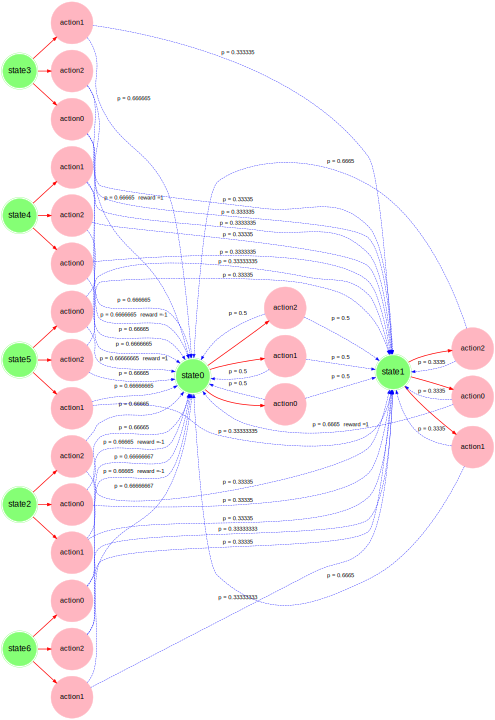

In [91]:
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, plot_graph_optimal_strategy_and_state_values
    display(plot_graph(mdp))

Policy Iteration

In [86]:
def policy_eval(env, policy, V, discount_factor):

    policy_value = np.zeros(env.nS)
    for state, action in enumerate(policy):
        for probablity, next_state, reward, info in env.P[state][action]:
            policy_value[state] += probablity * (reward + (discount_factor * V[next_state]))
            
    return policy_value

In [82]:
def one_step_lookahead(env, state, V , discount_factor = 0.90):    
    action_values = np.zeros(env.action_space.n)
    
    for action in range(env.action_space.n):
        for probablity, next_state, reward, info in env.P[state][action]:
            action_values[action] += probablity * (reward + (discount_factor * V[next_state]))
            
    return action_values

In [83]:
def update_policy(env, policy, V, discount_factor):    
    
    for state in range(env.nS):
        action_values = one_step_lookahead(env, state, V, discount_factor)        
        policy[state] =  np.argmax(action_values)
        
    return policy

In [84]:
def policy_iteration(env, discount_factor = 0.90, max_iteration = 1000):

    V = np.zeros(env.nS)    
    policy = np.random.randint(0, 4, env.nS)
    policy_prev = np.copy(policy)
    
    for i in range(max_iteration):
        
        V = policy_eval(env, policy, V, discount_factor)        
        policy = update_policy(env, policy, V, discount_factor)
        if i % 10 == 0:
            if (np.all(np.equal(policy, policy_prev))):
                print('policy converged at iteration %d' %(i+1))
                break
            policy_prev = np.copy(policy)               
    return V, policy

In [87]:
opt_V2, opt_policy2 = policy_iteration(env, discount_factor = 0.90, max_iteration = 10000)
print('Optimal Value function: ')
print(opt_V2)
print('Final Policy: ')
print(opt_policy2)

policy converged at iteration 31
Optimal Value function: 
[0.0651776  0.05828125 0.07212566 0.05331999 0.08846727 0.
 0.11096941 0.         0.14267761 0.24562088 0.29829636 0.
 0.         0.37856825 0.63829882 0.        ]
Final Policy: 
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


In [88]:
n_episode = 1000
total_reward, avg_reward, episode_rewards = play_episodes(env, n_episode, opt_policy2, random = False)

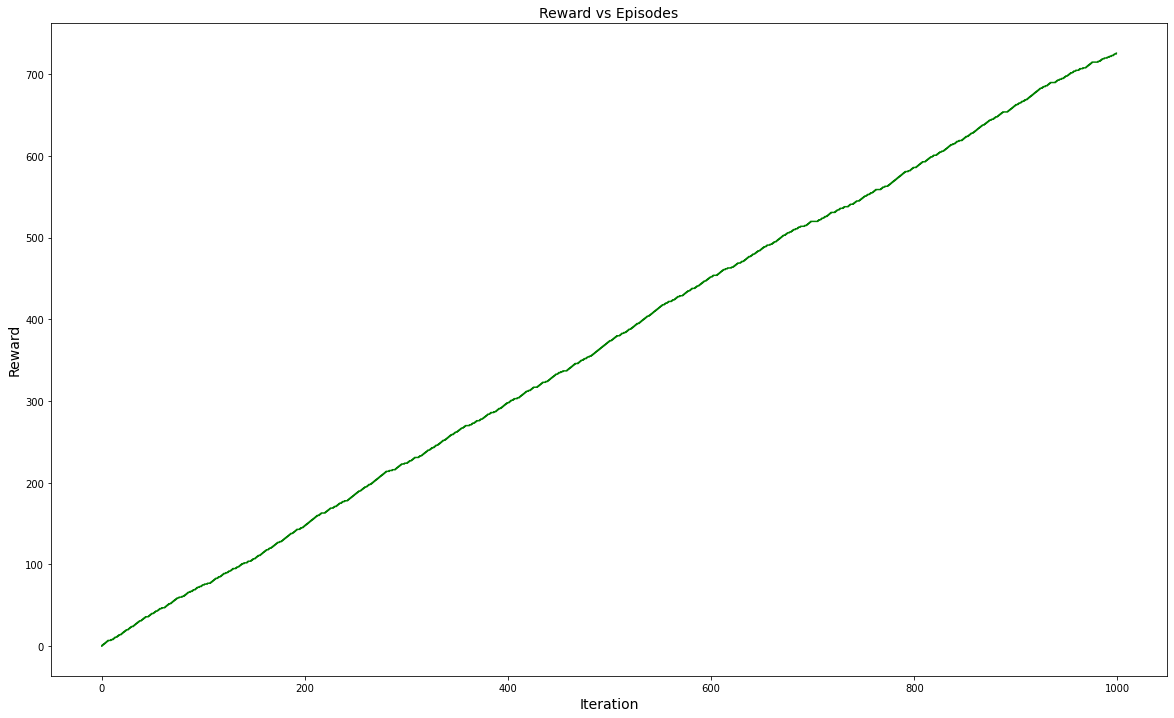

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.plot([x for x, y in episode_rewards], [y for x, y in episode_rewards],color='green')
plt.title('Reward vs Episodes', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Reward', fontsize=14)
plt.grid(False)
plt.show()